# #1 Notebook | EDA on Abalone data.

## What is Abalone?.

<img src="https://df2sm3urulav.cloudfront.net/tenants/gr/uploads/images/200000-204999/203495/203495_1289195309.jpg" height=250 width=250>

Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae. Other common names are ear shells, sea ears, and muttonfish or muttonshells in Australia, ormer in the UK, perlemoen in South Africa, and paua in New Zealand. Abalone are marine snails.

## Age of Abalone.

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope, a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

/kaggle/input/abalone-dataset/abalone.csv


In [2]:
data_path = '/kaggle/input/abalone-dataset/abalone.csv'
raw_df = pd.read_csv(data_path)

In [3]:
raw_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


**Let's add the 'age' column in the data frame to proceed with our EDA and predictions.**
> *According to the research age of abalone = Number of rings + 1.5.*

From the above information it can be determined that the data provided is quite consistent and clean from missing values. This kind of data is good to proceed and detect outliers.

In [5]:
raw_df['Age'] = raw_df['Rings']+1.5
df = raw_df #just a copy to be safe
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [6]:
val_labl = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',]
trgt_labl = ['Rings', 'Age']
catg_lbl = ['Sex']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


# Handling Outliers

There are total of 7 feature we need to plot against age and eliminate all poosible outliers based over our analysis

In [8]:
def plot_graph(var, color='r'):
    plt.figure(figsize=(10,5))
    plt.scatter(x = df[var], y = df['Age'], marker='+', c=color, s=60, alpha=0.7)
    plt.ylabel('Age of Abalone')
    plt.xlabel(var+' of Abalone')
    plt.grid(True)

In [9]:
def data_removal(var, para1, para2):
    df.drop(df[(df[var]> para1)].index, inplace=True)
    df.drop(df[(df[var]< para2)].index, inplace=True)

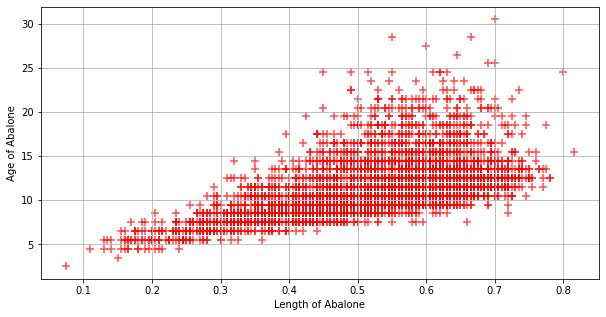

In [10]:
plot_graph(val_labl[0])

In [11]:
data_removal(val_labl[0], 0.8, 0.1)
df.drop(df[(df[val_labl[0]]==0.8)].index, inplace=True)

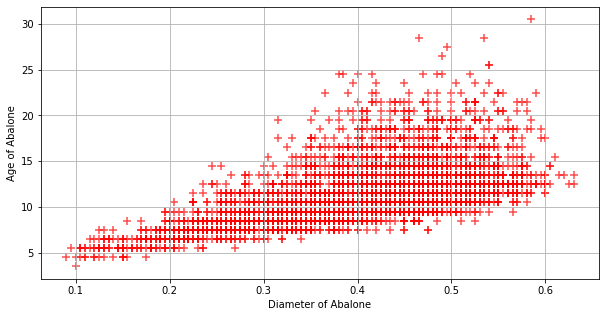

In [12]:
plot_graph(val_labl[1])

In [13]:
data_removal(val_labl[1],0.65,0.1)

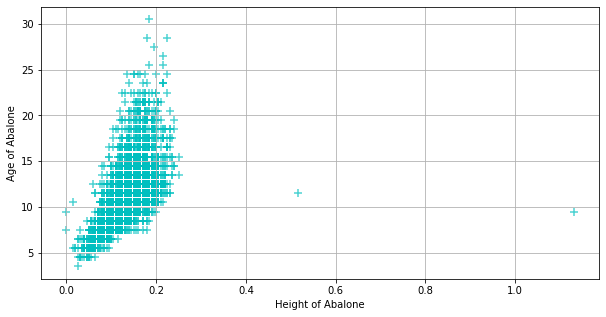

In [14]:
plot_graph(val_labl[2], 'c')

In [15]:
data_removal(val_labl[2],0.4,0)

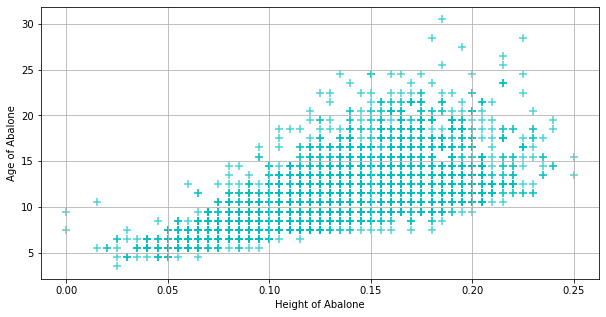

In [16]:
plot_graph(val_labl[2], 'c')

In [17]:
data_removal(val_labl[2],0.25,0.01)

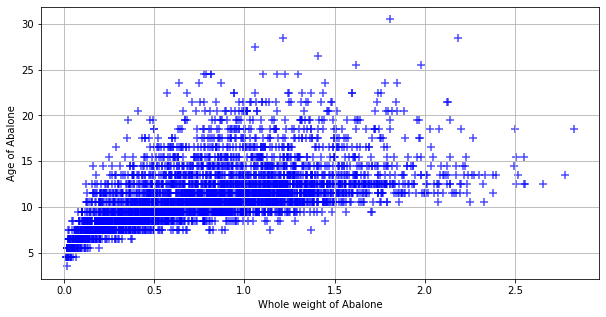

In [18]:
plot_graph(val_labl[3], 'b')

In [19]:
data_removal(val_labl[3],2.52,0)

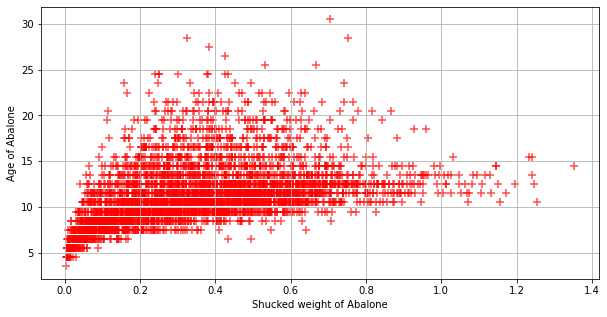

In [20]:
plot_graph(val_labl[4])

In [21]:
data_removal(val_labl[4],1.20,0)

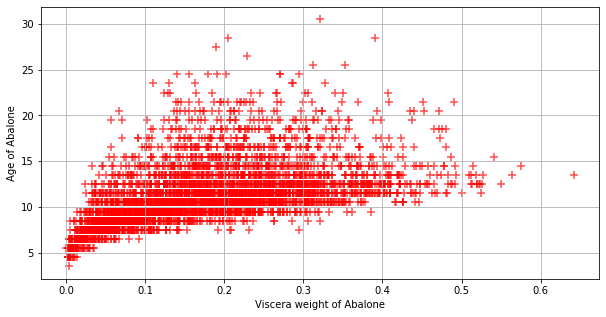

In [22]:
plot_graph(val_labl[5])

In [23]:
data_removal(val_labl[5],0.55,0)

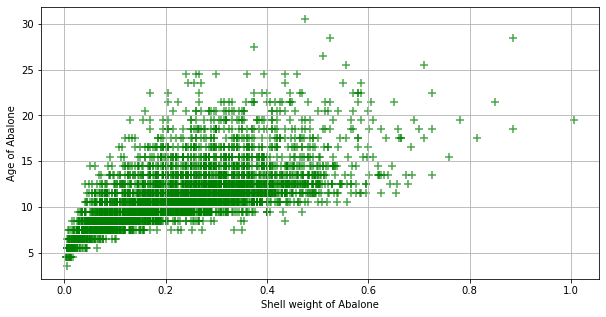

In [24]:
plot_graph(val_labl[6], 'g')

In [25]:
data_removal(val_labl[6],0.75,0)

## Observations: -
If you notice you can see incosistency in data for all the feature when age is greater than 25. Which can be taken as outlier if the points are corresponding to it are not much.

In [26]:
df[df['Age'] >= 25]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375,26,27.5
480,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29,30.5
2201,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.510,25,26.5
2209,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525,27,28.5
3149,F,0.700,0.540,0.215,1.9780,0.6675,0.3125,0.710,24,25.5
3280,M,0.690,0.540,0.185,1.6195,0.5330,0.3530,0.555,24,25.5


These values of age above 25 can be considered as an outlier as there is just one value and also its presence makes data distribution against other feature makes incosistency as seen in the above graphs.
Still there are outliers due to the data corresponding to Ages above **25**. So for this analysis we will be romving these values for ages.

In [27]:
data_removal('Age',25,0)

## After Outlier Detection and Removal

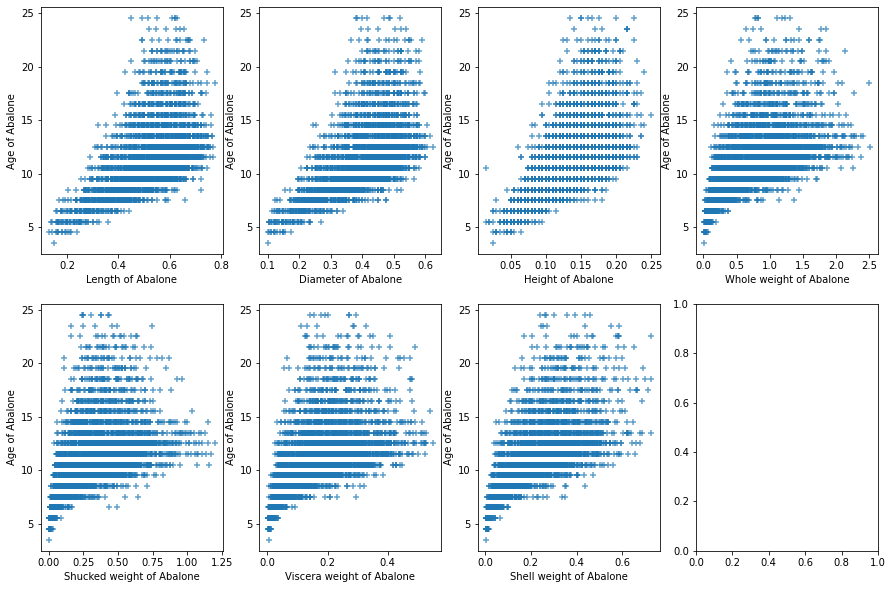

In [28]:
fig = plt.figure(figsize=[15,10])
axes = fig.subplots(2, 4)
k = 0
for i in range(2):
    for j in range(4):
        if k == 7: break
        axes[i][j].scatter(df[val_labl[k]], df['Age'], alpha=0.7, marker='+',s= 40)
        axes[i][j].set(xlabel=val_labl[k]+' of Abalone', ylabel='Age of Abalone')
        k+=1

# Let's Begin with the Analysis
---
#### Main questions for the Analysis will be.
- **How Age of Abalone relates to different physical features of itself.**
- Is there any relation among the physical features of Abalone
- Do sex of Abalone holds any relation to the Age of Abalone.

In [29]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,0.522940,0.406966,0.138827,0.819618,0.355389,0.178947,0.235970,9.890097,11.390097
std,0.118776,0.098157,0.037881,0.476549,0.215217,0.107257,0.134406,3.136848,3.136848
min,0.130000,0.100000,0.015000,0.013000,0.004500,0.000500,0.004000,2.000000,3.500000
25%,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000,9.500000
50%,0.540000,0.425000,0.140000,0.795500,0.334500,0.169500,0.230000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.144625,0.498500,0.250125,0.325000,11.000000,12.500000
max,0.775000,0.625000,0.250000,2.505000,1.196500,0.550000,0.726000,23.000000,24.500000


## Observation: -
---
- *Average age of an abalone can be tagged as 11.4*.
- The age of abalone in data ranges for 2.5(min) to 30.50(max) which is quite interesting as the average is 11.43.
- Standard Deviation for all the feature except 'Age and 'Rings' tell us the distribution of data is not a wide spreaded but resided near mean value.

### Let's see if some correlations exist in the data features

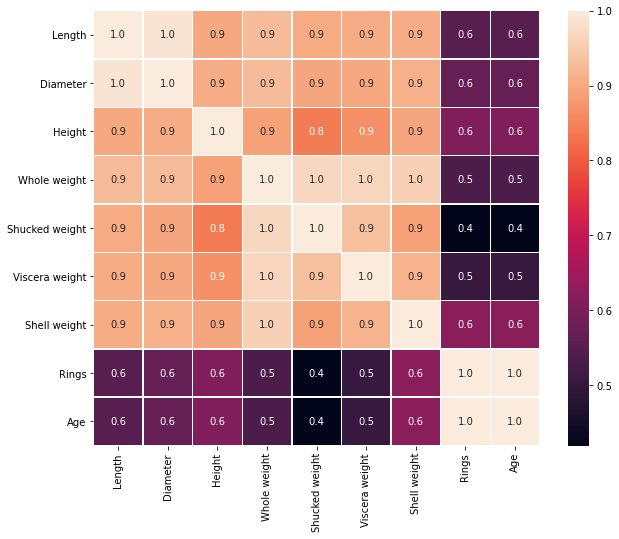

In [30]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Observations:
- There is lot of correlation between various features with each other.
- There is no direct correlation of any feature with our target variable 'Age'.
- The above correlation map helps us to understand and relate the biological studies on abalone.

## Digging deeper to find linear relationship between features

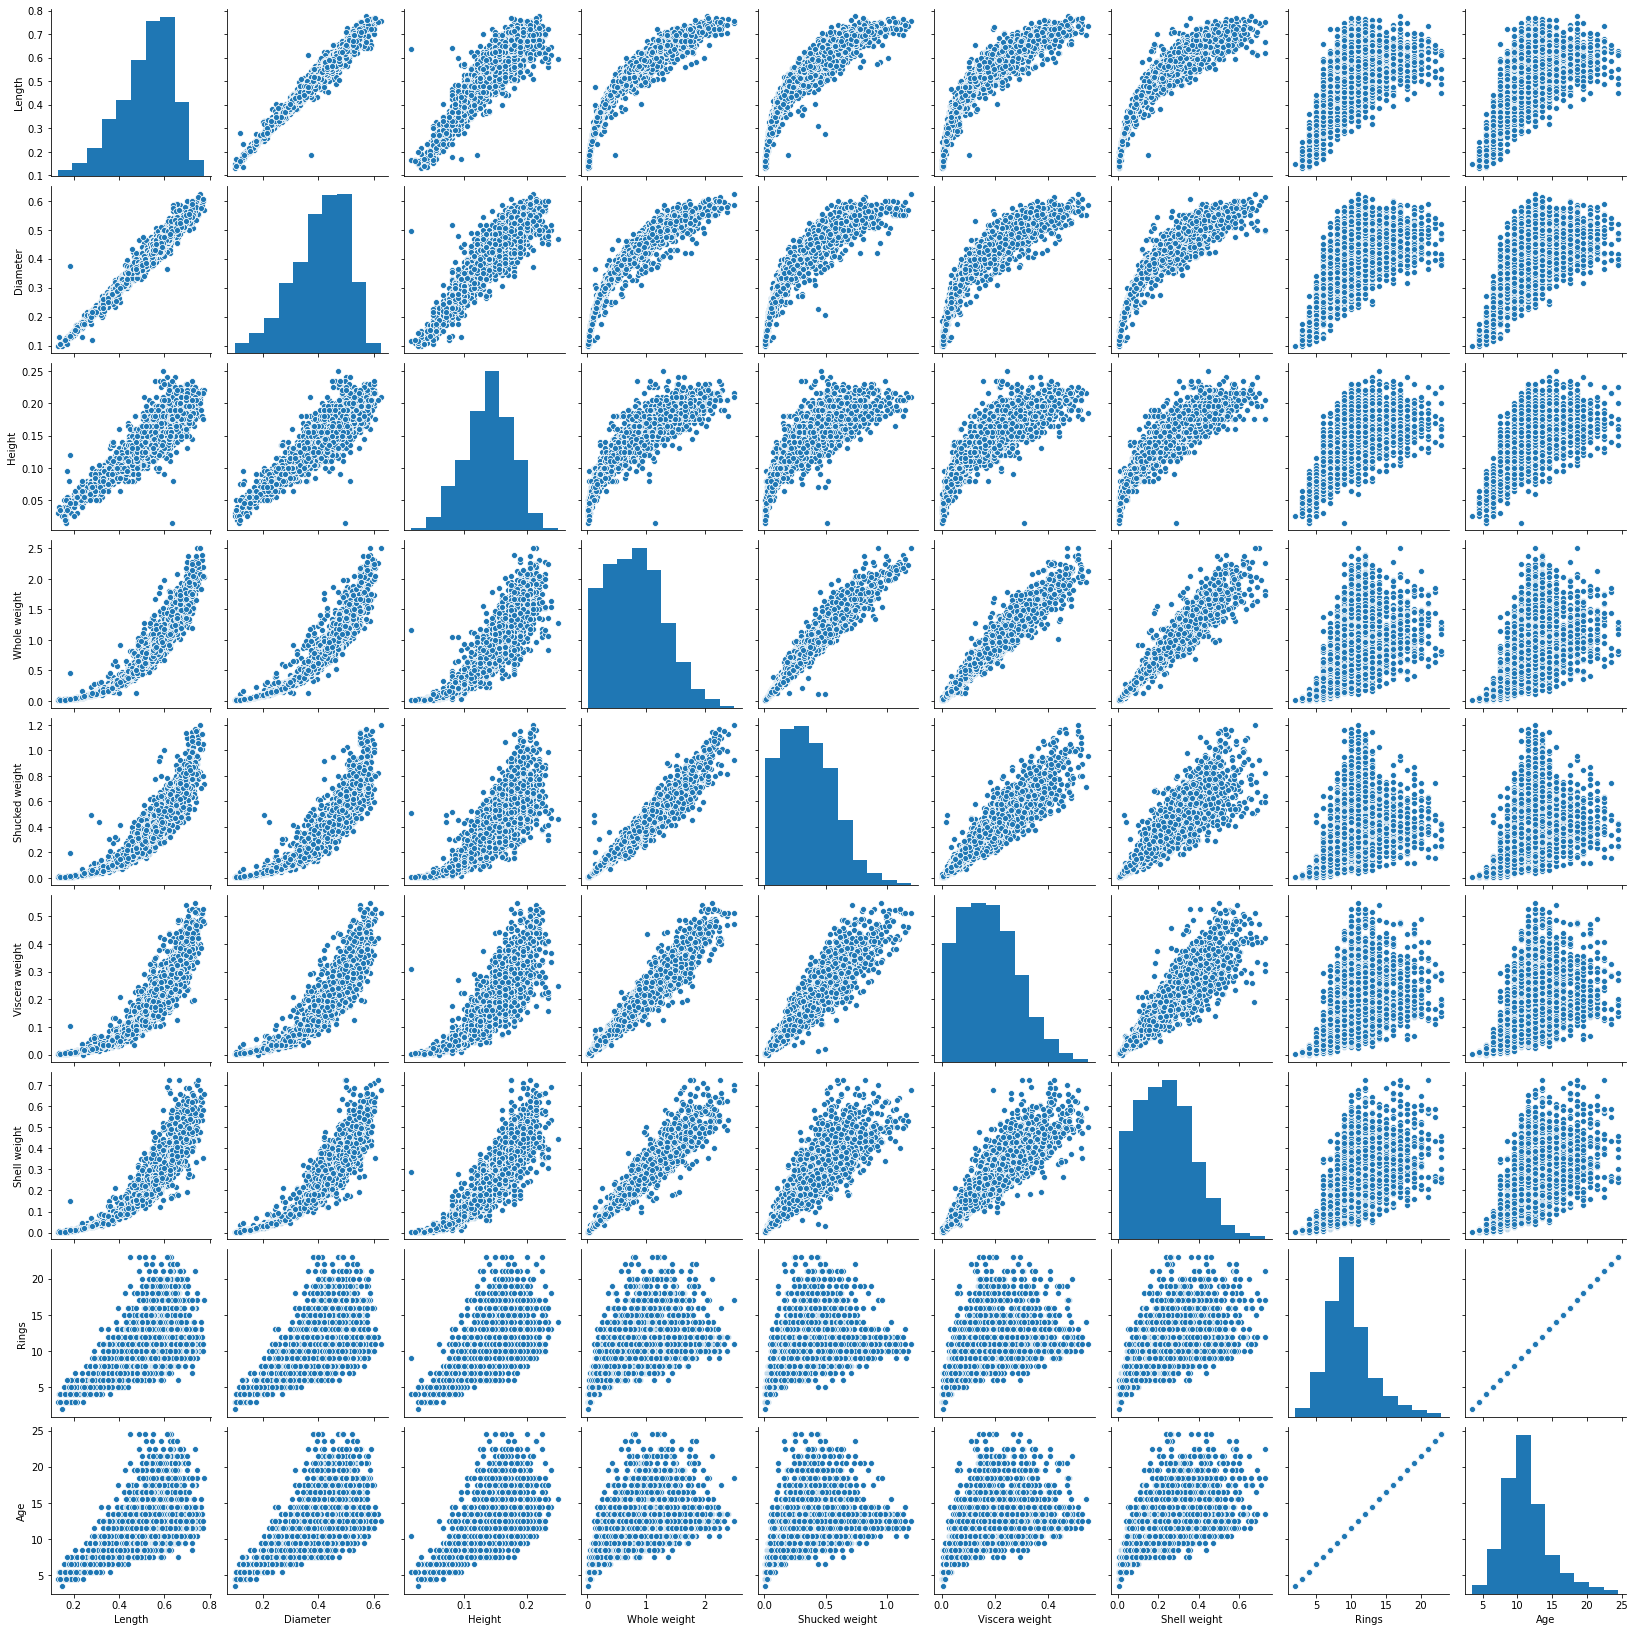

In [31]:
sns.pairplot(df[df.select_dtypes(include=[np.number]).columns])

### Observations:-
Supporting our heatmap we can see strong linear relatioships between
- Length vs Diameter
- Whole weight vs Shucked Weight
- Whole weight vs Viscera Weight

In [32]:
df.skew(axis = 0, skipna = True) 

Length           -0.646081
Diameter         -0.619560
Height           -0.268234
Whole weight      0.434301
Shucked weight    0.587663
Viscera weight    0.516219
Shell weight      0.458430
Rings             0.993374
Age               0.993374
dtype: float64

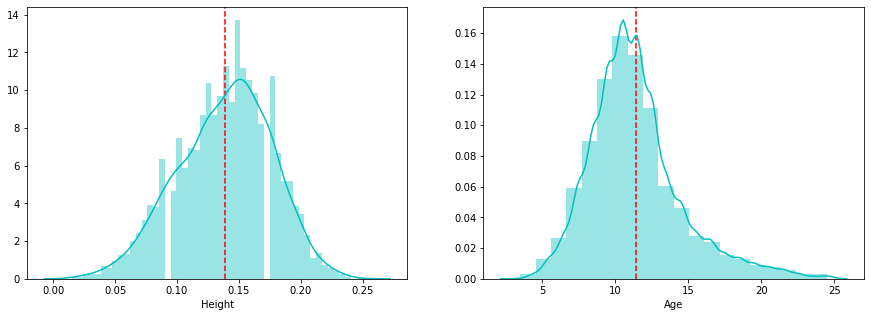

In [33]:
fig = plt.figure(figsize=[15,5])
axes = fig.subplots(1, 2)

axes[0].axvline(df['Height'].mean(), ls='--', color='r')
axes[1].axvline(df['Age'].mean(), ls='--', color='r')

sns.distplot(df['Height'], bins=50, ax=axes[0], color='c')
sns.distplot(df['Age'], bins=20, ax=axes[1], color='c')


### Observations:-
- The data is not normally distributed but is near the normal distribution.
- Height and Age have skewness > 0 and hence are skewed right and contain more weight towards right tail.

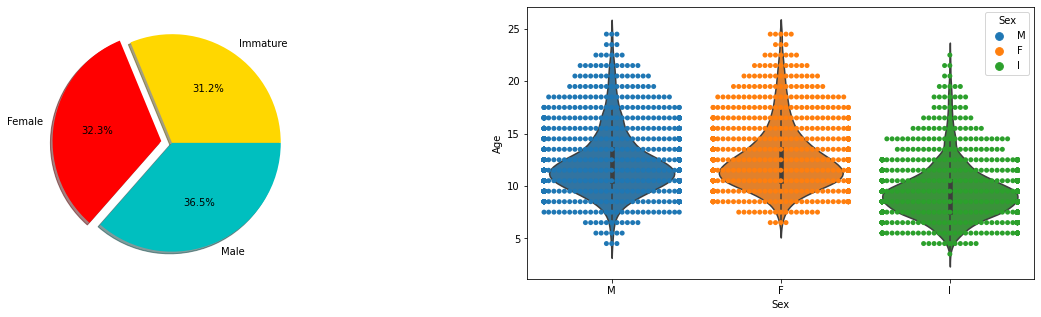

In [34]:
fig = plt.figure(figsize=[20,5])
axes = fig.subplots(1, 2)
axes[0].pie(df.groupby(['Sex']).size(), explode=(0,0.1,0), colors=['gold', 'r', 'c'], shadow=True, autopct='%1.1f%%', labels=['Immature','Female','Male'])
sns.violinplot(x = 'Sex', y = 'Age', data = df, ax=axes[1], colors=['c', 'r', ''])
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex', ax=axes[1])

### Observations: -
----
- In the data the male is in the majority followed by Immatures and last is the femal.
- Female have the widest range of age.
- Immature has the smallest range of age.
- Male has the range of age lieing in between 7.5 years to 19 years.
- Female has the range of age lieing in between 8 years to 19 years.
- Immature has the range of age lieing in between 6 years to < 10 years.

# Modelling

![gif_lets_get_started](https://media0.giphy.com/media/Ln2dAW9oycjgmTpjX9/giphy.gif)

## Linear Regression:-

In [35]:
X = df[val_labl]
y = df['Age']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7)

In [37]:
lr_model = LinearRegression()
clf = lr_model.fit(X_train, y_train)

In [38]:
print("LinearRegression Train Score: ",  clf.score(X_train, y_train))
print("LinearRegression Test Score: ",  clf.score(X_test, y_test))

LinearRegression Train Score:  0.5063371964777336
LinearRegression Test Score:  0.5304834787193072


The scores are pretty bad and the model can be changed or tuned for better performance. I am not empphasising on it as it is an EDA rather than building an model for prediction. 

# Summary: -
1. Yes, It is possible to determine age of an abalone without using a Microsocpe.
2. Yes, It is possible to estimate age of Abalone without cutting it and counting the rings as physical features of the Abalone show some relation towards Age of the Abalone.
3. No, the method of determining age of abalone through it's physical features is as relaible as the method determining it using number of rings as there is some relation but all factors are not completely dependent.
4. From the given data we can also say that a Female Abalone is more likely to live longer than other two sexes of the abalone.
5. Our EDA supports most of the already known facts about Abalone and its physical features.

### Request-
This is my first notebook on kaggle and I might have done some mistakes, forgotten few things, did something wrong, made some wrong observations or assumptions. Please feel free to correct me and If you find my EDA good please show your support by upvoting my kernel as motivation.

![Thank you](https://media.giphy.com/media/95P1vO6r7rsk0/giphy.gif)